In [1]:
# import libraries 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
heart.isnull().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
heart.duplicated().sum()

1

In [5]:
heart.drop_duplicates(keep = 'first', inplace = True)

In [6]:
heart.describe().T

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exng      302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slp       302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
caa       302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thall     302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
output    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

In [7]:
## Compare Heart Attack vs Sex 
df = pd.crosstab(heart['output'], heart['sex'])
df

sex      0    1
output         
0       24  114
1       72   92

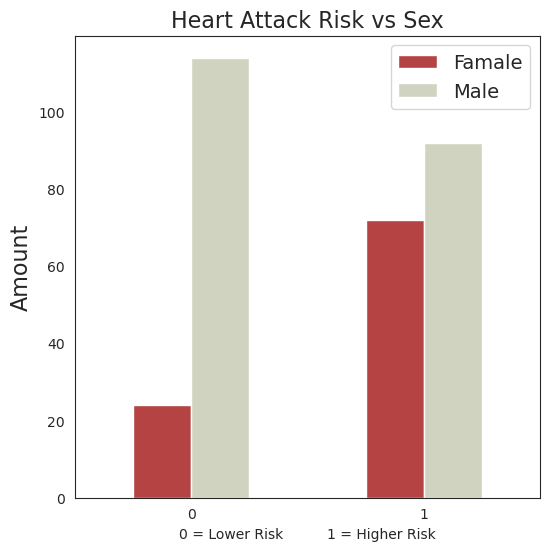

In [8]:
sns.set_style('white')

df.plot(kind = 'bar',
       figsize = (6,6),
        color = ['#b64343', '#d1d3c1'])

plt.title('Heart Attack Risk vs Sex', fontsize = 16)
plt.xlabel('0 = Lower Risk          1 = Higher Risk')
plt.ylabel('Amount', fontsize = 16)
plt.legend(['Famale' ,'Male'], fontsize = 14)
plt.xticks(rotation = 0)
plt.show()


In [9]:
fig = px.pie(heart, 
            names = 'sex',)

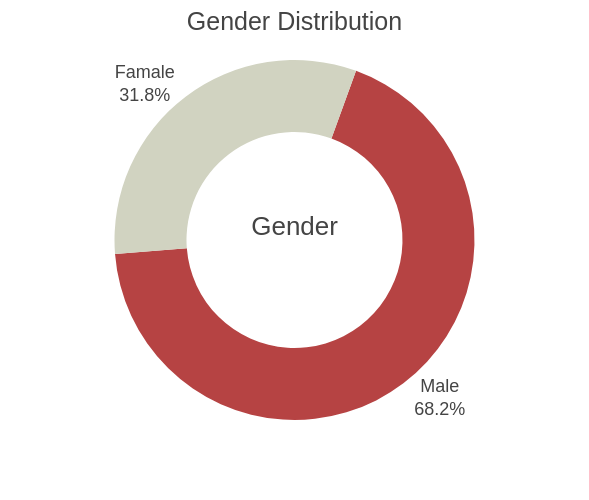

In [10]:
fig = px.pie(heart, 
            names = heart['sex'].map({0: 'Famale', 1:'Male'}),
            template = 'presentation', 
            hole = 0.6,
             color_discrete_sequence=['#b64343', '#d1d3c1'])

#layout
fig.update_layout(title_text = 'Gender Distribution',
                   title_x = 0.5,
                   font = dict(size = 18),
                   autosize = True, 
                   width = 500,
                   height = 500,
                   showlegend = False)

fig.add_annotation(dict(x=0.5, y = 0.5, align = 'center',
                     xref = 'paper', yref = 'paper',
                     showarrow = False, font_size = 22,
                     text = "<span style ='font-size: 26px; color = #555; font-family:Arial'> Gender <br> </span >"))

fig.update_traces(textposition = 'outside', textinfo = 'percent+label', rotation = 20)
fig.show()

- It is observable than the males have more risk of a heart attack.

### Age-based Data Visualization

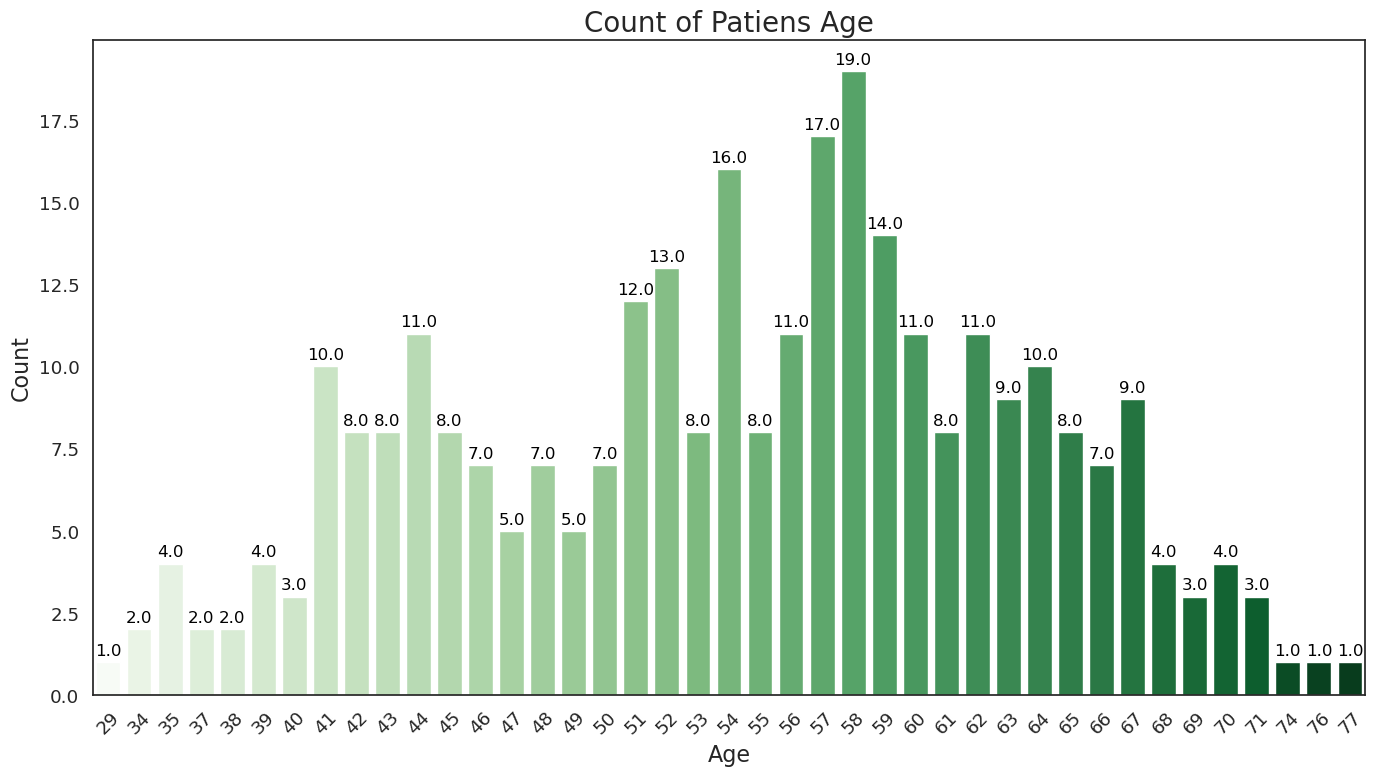

In [12]:
plt.figure(figsize = (14,8))
sns.set(font_scale = 1.2)
sns.set_style('white')

sns.countplot(x = heart['age'], hue = heart['age'], palette = 'Greens', legend = False)

plt.title('Count of Patiens Age', fontsize = 20)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()

plt.show()

<Figure size 800x600 with 0 Axes>

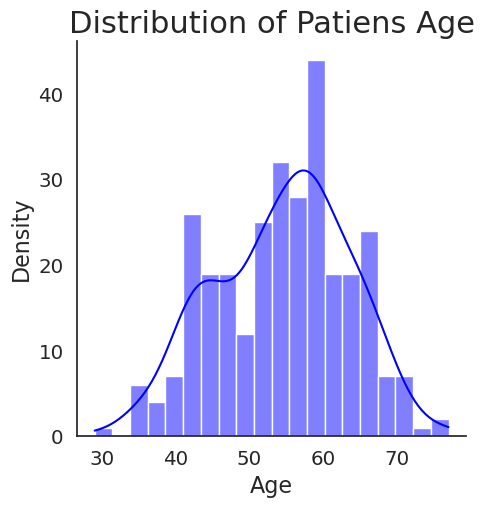

In [13]:
# Age base Analysis 

sns.set(font_scale = 1.3)

plt.figure(figsize = (8,6))
sns.set_style('white')
sns.displot(heart['age'],
           color = 'blue',
           kde = True,
           bins = 20)

plt.title('Distribution of Patiens Age', fontsize = 22)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.show()


- We can see in the graph that more numerous population is between 40 and 65 years old.

### Cholesterol level-based data visualization

<Figure size 800x600 with 0 Axes>

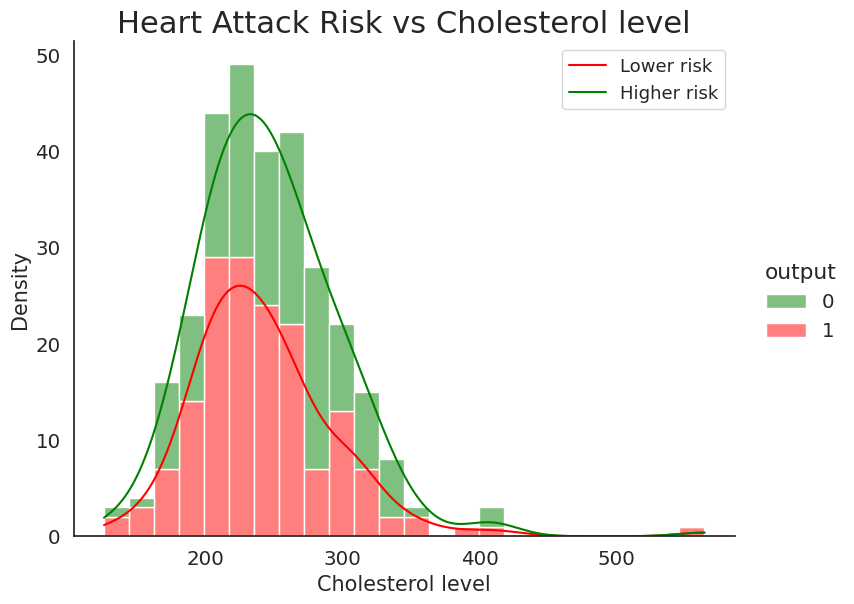

In [15]:
# Attack vs Cholesterol analysis

sns.set(font_scale = 1.3)
plt.figure(figsize = (8,6))
sns.set_style('white')

sns.displot(data=heart, x='chol', hue='output', kind='hist', kde=True, height=6, aspect=1.3, palette={0: 'green', 1: 'red'}, multiple='stack')

#sns.displot(data=heart, x='chol', hue='output', kind='kde', height=6, aspect=1.3, palette={0: 'green', 1: 'red'})
#sns.displot(data = heart, x = 'chol', hue = 'output', kind = 'kde', pallete = {0: 'green', 1:'red'})
#sns.displot(heart[heart['output']==0]['chol'], color = 'green')
#sns.displot(heart[heart['output']==1]['chol'], color = 'red')

plt.title('Heart Attack Risk vs Cholesterol level', size = 22)
plt.xlabel('Cholesterol level', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend(['Lower risk', 'Higher risk'], fontsize = 13)
plt.show()

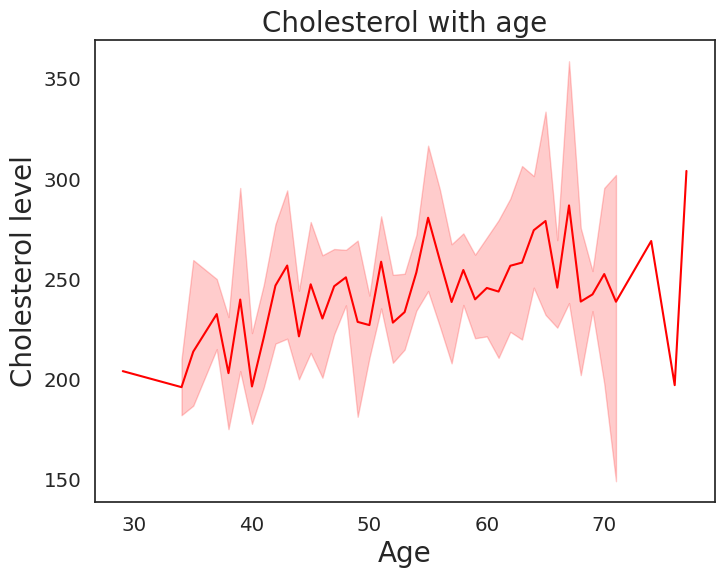

In [16]:
plt.figure(figsize = (8,6))
sns.lineplot(data = heart,
            x = 'age',
            y = 'chol',
            color = 'red')
plt.title('Cholesterol with age', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholesterol level', fontsize = 20)
plt.show()

- The curve that contains the most of the patiens is between 200 and 350.
- Cholesterol levels increase with age

### Chest Pain Type-based data visualization

In [18]:
heart['cp'].unique()

array([3, 2, 1, 0])

In [19]:
# Relation of heart Attack with chest Pain type
cp_mapping = {0:'Typical angina' , 1: 'Atypical Angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'}
df = pd.crosstab(heart['cp'].replace(cp_mapping), heart['output'])

df


output              0   1
cp                       
Asymptomatic        7  16
Atypical Angina     9  41
Non-anginal pain   18  68
Typical angina    104  39

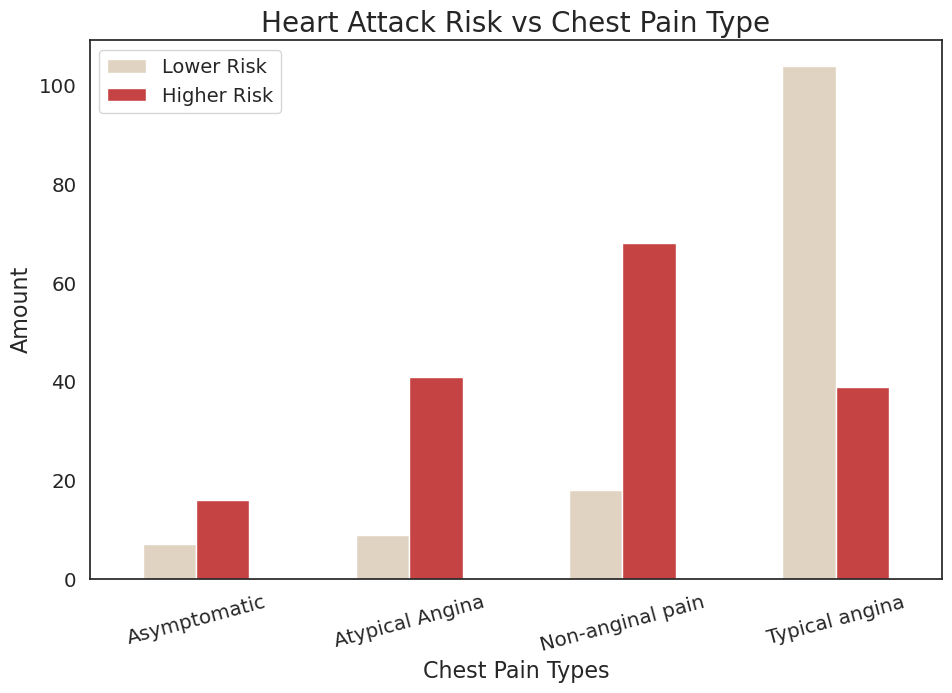

In [20]:
# Make the crosstab visual

sns.set(font_scale = 1.3)
sns.set_style('white')

df.plot(kind = 'bar',
       figsize = (11,7),
       color = ['#e1d3c1', '#c64343'])
plt.title('Heart Attack Risk vs Chest Pain Type', fontsize = 20)
plt.xlabel('Chest Pain Types', fontsize = 16)
plt.ylabel('Amount', fontsize = 16)
plt.legend(['Lower Risk', 'Higher Risk'], fontsize = 14)
plt.xticks(rotation = 15)
plt.show()

- Most of the patients have **typical angina** pain.
- Patients with **non-anginal pain** have the higher risk of heart attack.

### Correlation-based data visualization

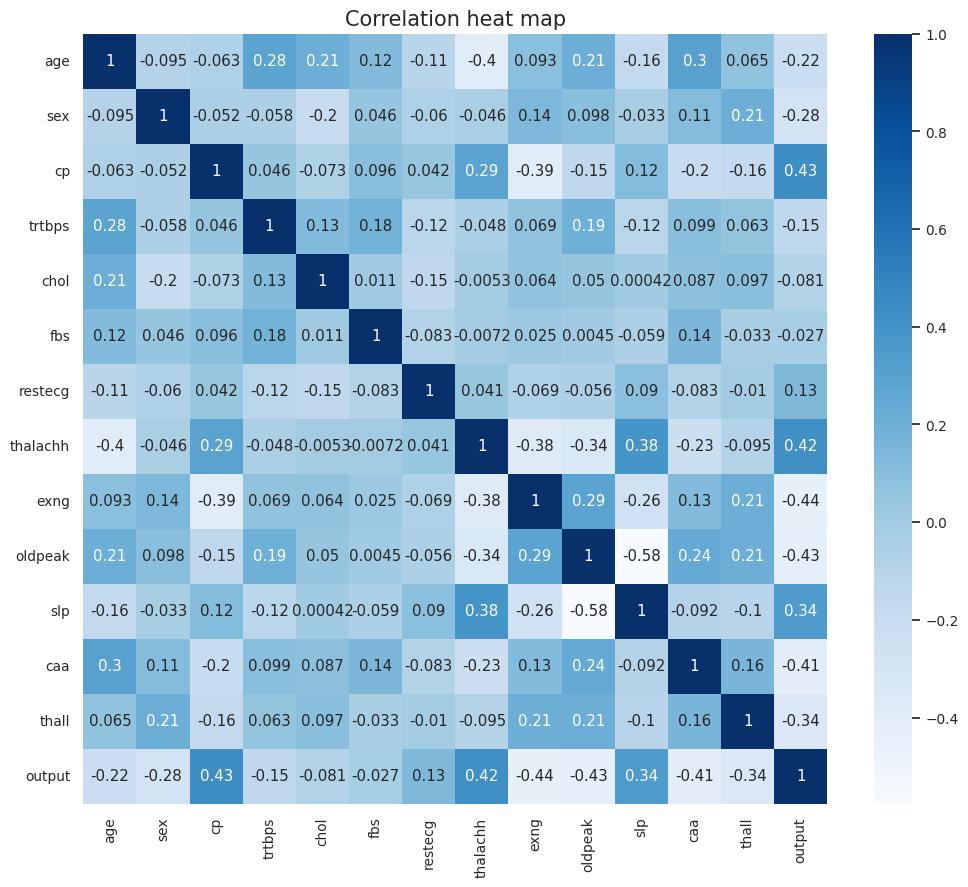

In [46]:
plt.figure(figsize = (12,10))
sns.set(font_scale = 0.9)

sns.heatmap(heart.corr(),
           annot = True,
           cmap = 'Blues')

plt.title('Correlation heat map', size = 15)
plt.show()

#### Interpretations 
The heatmap shows us there is a positive correlation between (more 0.4)
- Chest Pain Type (cp) and Output
- Maximum heart rate achieved (thalachh) and output
- Slope (sp) and Output

The heatmap shows  us there is a negative correlation between (less than -.4)

- Previous peak (oldpeak) vs output
- Number of major vessels (caa) vs output
- Slope (slp) vs Previous peak (oldpeak)
- Excercise-induced angina (exng) vs output 